<a href="https://colab.research.google.com/github/phucdzu/AI/blob/main/improta2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=d8335cd00ea2314e5f34a7e0d8a47fc2a8e494259fc9f8deb1dda87c091d131c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

In [4]:
glycaemia = ctrl.Antecedent(np.arange(70,135,1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(0,3510,10),'proteinuria')

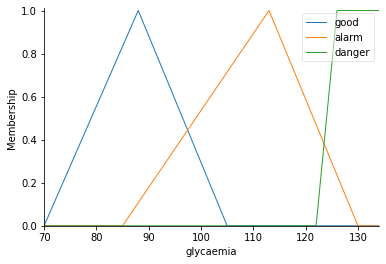

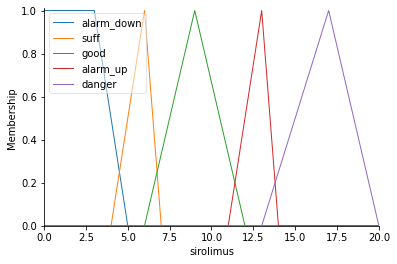

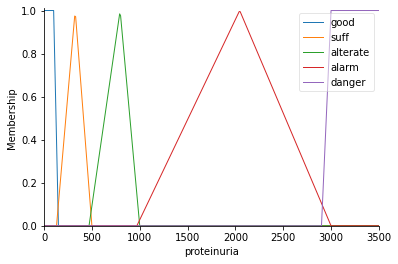

In [5]:
glycaemia['good']= fuzz.trimf(glycaemia.universe,[70,88,105])
glycaemia['alarm']= fuzz.trimf(glycaemia.universe,[85,113,130])
glycaemia['danger']= fuzz.trapmf(glycaemia.universe,[122,126,135,135])
glycaemia.view()

sirolimus['alarm_down']= fuzz.trapmf(sirolimus.universe,[0,0,3,5])
sirolimus['suff']= fuzz.trimf(sirolimus.universe,[4,6,7])
sirolimus['good']= fuzz.trimf(sirolimus.universe,[6,9,12])
sirolimus['alarm_up']= fuzz.trimf(sirolimus.universe,[11,13,14])
sirolimus['danger']= fuzz.trimf(sirolimus.universe,[13,17,20])
sirolimus.view()

proteinuria['good']= fuzz.trapmf(proteinuria.universe,[0,0,100,150])
proteinuria['suff']= fuzz.trimf(proteinuria.universe,[130,325,500])
proteinuria['alterate']= fuzz.trimf(proteinuria.universe,[470,795,1000])
proteinuria['alarm']= fuzz.trimf(proteinuria.universe,[970,2045,3000])
proteinuria['danger']= fuzz.trapmf(proteinuria.universe,[2900,3000,3500,3500])
proteinuria.view()

In [6]:
rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'],proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'],proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'],proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm_up'],proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'],proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_up'],proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'],proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_down'],proteinuria['suff'])

262.5259061297685


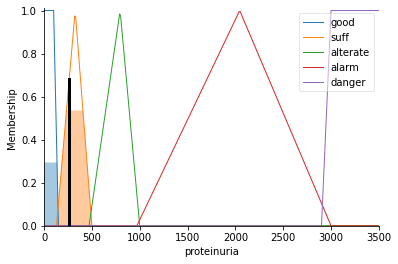

In [7]:
proteinuriaring_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
proteinuriaring= ctrl.ControlSystemSimulation(proteinuriaring_ctrl)
proteinuriaring.input['glycaemia']=100
proteinuriaring.input['sirolimus']=8.82
proteinuriaring.compute()
print(proteinuriaring.output['proteinuria'])
proteinuria.view(sim=proteinuriaring)